# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Classified Data.csv')
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scale the features using sklearn.preprocessing package

In [3]:
scaler = preprocessing.StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [6]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS'].values
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS']
                                                    ,test_size=0.40, random_state=101)
X_cv,X_test1,y_cv,y_test1=train_test_split(scaled_features,df['TARGET CLASS']
                                                    ,test_size=0.50, random_state=101)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = knn.predict(X_test)
print('y_pred',pred)
print('y_test',y_test.values)

y_pred [0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0]
y_test [0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0

### Evaluation of classification quality using Confusion Matrix

In [9]:
cm=confusion_matrix(y_test, pred)
cm


array([[189,  15],
       [ 21, 175]], dtype=int64)

***Print Misclassification error rate***

In [11]:
miss_error=1-(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
miss_error


0.08999999999999997

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [12]:
score=cross_val_score(knn,df_feat,df["TARGET CLASS"])
score
np.mean(score)

0.9029999999999999

In [13]:
def crossvaliderror (k):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    knn_cv.fit(X_cv,y_cv)
    score=cross_val_score(knn_cv,df_feat,df["TARGET CLASS"])
    np.mean(score)
    return 1-np.mean(score)
    
    

In [14]:
allerrors=[]
for k in range(1,8):
    allerrors.append(crossvaliderror(k))
allerrors

    

[0.09700000000000009,
 0.1050000000000001,
 0.08599999999999997,
 0.08000000000000007,
 0.07699999999999996,
 0.07400000000000007,
 0.06999999999999995]

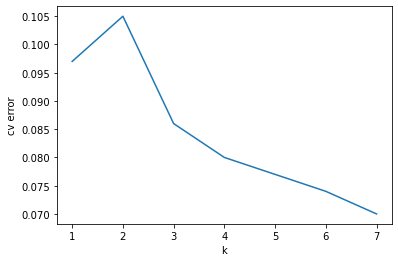

In [15]:
plt.xlabel("k")
plt.ylabel('cv error')

plt.plot(range(1,8),allerrors)